<a href="https://colab.research.google.com/github/alperbozoglu/LectureNotes/blob/main/PolynomialRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

In [3]:
np.random.seed(0)
x = np.linspace(0, 5, 100)
y = 3 * x**2 + 1 + np.random.randn(100)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(x.reshape(-1, 1), y, test_size = 0.2, random_state = 42)

Derece 1: MSE = 36.67, MAE = 4.86, RMSE = 6.06, R-kare = 0.91


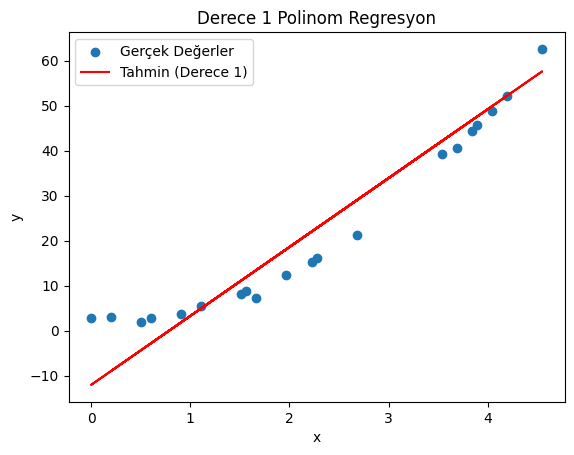

Derece 2: MSE = 0.86, MAE = 0.78, RMSE = 0.93, R-kare = 1.00


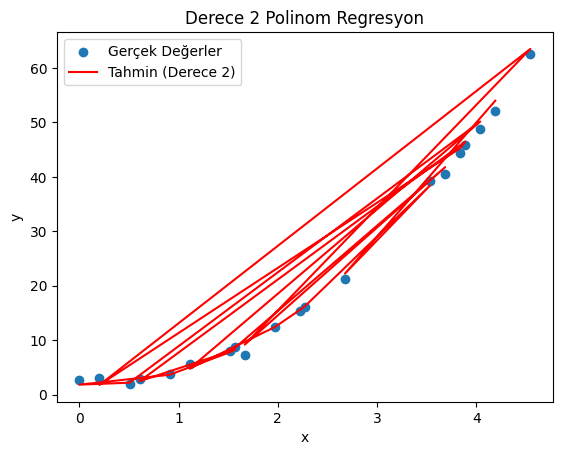

Derece 3: MSE = 0.86, MAE = 0.78, RMSE = 0.93, R-kare = 1.00


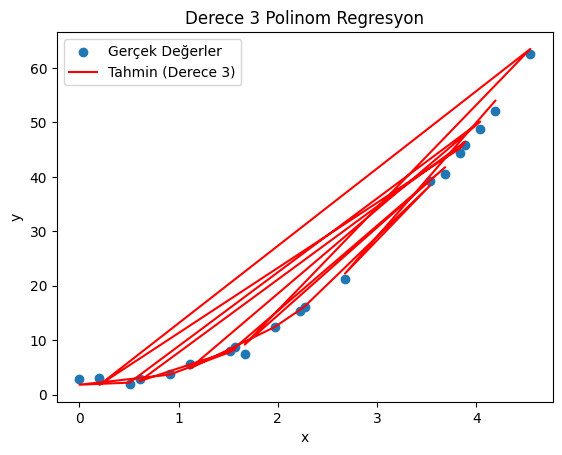

Derece 4: MSE = 0.94, MAE = 0.79, RMSE = 0.97, R-kare = 1.00


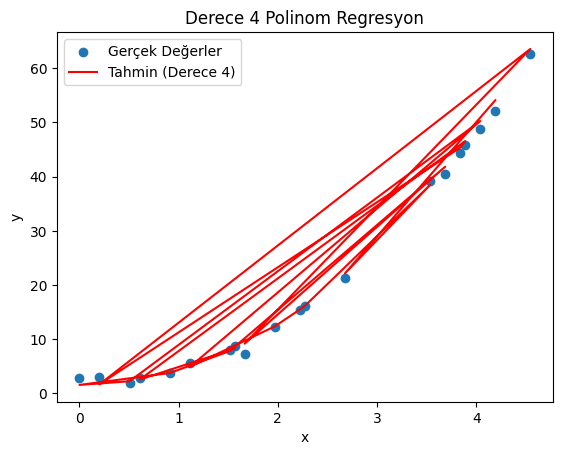

In [6]:
for degree in range(1,5):
  #Polinom Özellikleri
  poly_features = PolynomialFeatures(degree = degree)
  X_poly_train = poly_features.fit_transform(X_train)
  X_poly_test = poly_features.transform(X_test)

  #Model oluşturma ve eğitme
  model = LinearRegression()
  model.fit(X_poly_train,y_train)

  #Tahmin ve değerlendirme
  y_pred = model.predict(X_poly_test)
  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  rmse = math.sqrt(mse)
  r2 = r2_score(y_test, y_pred)

  print(f"Derece {degree}: MSE = {mse:.2f}, MAE = {mae:.2f}, RMSE = {rmse:.2f}, R-kare = {r2:.2f}")

  #Görselleştirme
  plt.figure()
  plt.scatter(X_test, y_test, label = "Gerçek Değerler")
  plt.plot(X_test, y_pred, color = "red", label = f"Tahmin (Derece {degree})")
  plt.xlabel("x")
  plt.ylabel("y")
  plt.legend()
  plt.title(f"Derece {degree} Polinom Regresyon")
  plt.show()